In [27]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
from shapely import wkt
from cartoframes.viz import *
import networkx as nx
import json

In [28]:
# 서울시 행정동 데이터
dong_boundary = gpd.read_file('../emd/BND_ADM_DONG_PG.shp', encoding='CP949')
dong = dong_boundary[dong_boundary['ADM_CD'].str.startswith('11')]   # 서울시내 동 정보 추출
dong.to_crs(epsg=4326, inplace=True)

# 동일한 신사동 구분
dong.loc[(dong['ADM_NM']=='신사동') & (dong['ADM_CD']=='11230510'), 'ADM_NM'] = '신사동(강남)'
dong.loc[(dong['ADM_NM']=='신사동') & (dong['ADM_CD']=='11210680'), 'ADM_NM'] = '신사동(은평)'

dong.head()

/home/hj/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


BASE_DATE ADM_NM    ADM_CD  \
0  20230701    사직동  11010530   
1  20230701    삼청동  11010540   
2  20230701    부암동  11010550   
3  20230701    평창동  11010560   
4  20230701    한남동  11030740   

                                            geometry  
0  POLYGON ((126.97399 37.57823, 126.97400 37.578...  
1  POLYGON ((126.97929 37.58349, 126.97931 37.583...  
2  POLYGON ((126.96173 37.60714, 126.96182 37.607...  
3  POLYGON ((126.97508 37.63118, 126.97488 37.630...  
4  POLYGON ((127.00457 37.54980, 127.00457 37.549...

In [29]:
print(dong.shape)

(426, 4)


In [30]:
layer_dong = Layer(dong,
                    basic_style(opacity=0.2), # 투명도
                    popup_hover=popup_element('ADM_NM')) # 얹으면 팝업


# Quang Data (AirBnB Information)

In [36]:
import pickle
import networkx as nx

# Path to the Pickle file (update with the actual file path)
pickle_file = "../Dataset/AirBnB_Graph/20170101.gpickle"

# Load the graph from the Pickle file
with open(pickle_file, 'rb') as f:
    G = pickle.load(f)

# Print basic information about the graph
print("Graph Info:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# # Print all nodes
# print("\nNodes:")
# print(list(G.nodes()))

# 이웃노드 정보 저장
neighbors = {}

# Print all edges with weights
#print("\nEdges:")
for edge in G.edges(data=True):
    print(edge)
    if edge[0] == '신사동':
        continue
    if edge[0] not in neighbors:
        neighbors[edge[0]] = []
    neighbors[edge[0]].append(edge[1])
    
n_df = pd.DataFrame({'ADM_NM': list(neighbors.keys()), 'Neighbors': list(neighbors.values())})
n_df

Graph Info:
Number of nodes: 404
Number of edges: 20352
('가락1동', '가락본동', {'weight': 0.99748914})
('가락1동', '가양3동', {'weight': 0.99711146})
('가락1동', '갈현1동', {'weight': 0.99754706})
('가락1동', '갈현2동', {'weight': 0.99727621})
('가락1동', '고덕1동', {'weight': 0.99716695})
('가락1동', '고척2동', {'weight': 0.99705244})
('가락1동', '광희동', {'weight': 0.99738113})
('가락1동', '구의2동', {'weight': 0.99766662})
('가락1동', '군자동', {'weight': 0.99819942})
('가락1동', '내곡동', {'weight': 0.99737708})
('가락1동', '녹번동', {'weight': 0.9978959})
('가락1동', '능동', {'weight': 0.99828107})
('가락1동', '답십리2동', {'weight': 0.99704925})
('가락1동', '당산2동', {'weight': 0.99825384})
('가락1동', '대림3동', {'weight': 0.99732296})
('가락1동', '대조동', {'weight': 0.99812335})
('가락1동', '독산4동', {'weight': 0.9977563})
('가락1동', '돈암1동', {'weight': 0.9972699})
('가락1동', '등촌1동', {'weight': 0.99799193})
('가락1동', '마장동', {'weight': 0.99750822})
('가락1동', '면목4동', {'weight': 0.99710706})
('가락1동', '목1동', {'weight': 0.99729528})
('가락1동', '반포3동', {'weight': 0.99833185})
('가락1동', '방배

ADM_NM                                          Neighbors
0     가락1동  [가락본동, 가양3동, 갈현1동, 갈현2동, 고덕1동, 고척2동, 광희동, 구의2동...
1     가락2동  [가리봉동, 가산동, 가양1동, 가양2동, 가회동, 개봉3동, 개포1동, 개포4동,...
2     가락본동  [갈현1동, 구로2동, 군자동, 금호1가동, 금호2·3가동, 길음1동, 노량진1동,...
3     가리봉동  [가산동, 가양1동, 가양2동, 가회동, 개봉1동, 개봉3동, 개포1동, 개포4동,...
4      가산동  [가양1동, 가양2동, 가회동, 개봉1동, 개봉3동, 개포1동, 개포4동, 거여2동...
..     ...                                                ...
392    황학동                                       [휘경1동, 휘경2동]
393    회기동                                              [후암동]
394    회현동                                   [효창동, 휘경1동, 흑석동]
395    효창동                                        [휘경1동, 흑석동]
396   휘경1동                                              [흑석동]

[397 rows x 2 columns]

In [37]:
dong_info = dong[['ADM_NM', 'geometry']]
dong_info = pd.merge(dong_info, n_df, on='ADM_NM', how='left')
dong_info['centroid'] = dong_info['geometry'].centroid   # 그래프 그리기용
dong_info

/tmp/ipykernel_947158/2666338822.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dong_info['centroid'] = dong_info['geometry'].centroid   # 그래프 그리기용


ADM_NM                                           geometry  \
0            사직동  POLYGON ((126.97399 37.57823, 126.97400 37.578...   
1            삼청동  POLYGON ((126.97929 37.58349, 126.97931 37.583...   
2            부암동  POLYGON ((126.96173 37.60714, 126.96182 37.607...   
3            평창동  POLYGON ((126.97508 37.63118, 126.97488 37.630...   
4            한남동  POLYGON ((127.00457 37.54980, 127.00457 37.549...   
..           ...                                                ...   
421          가회동  POLYGON ((126.98909 37.58983, 126.98902 37.589...   
422  종로1·2·3·4가동  POLYGON ((126.98937 37.58764, 126.98947 37.587...   
423         방배2동  POLYGON ((126.99063 37.48487, 126.99083 37.484...   
424          미아동  POLYGON ((127.02739 37.63495, 127.02729 37.634...   
425          인수동  POLYGON ((127.01090 37.64496, 127.01097 37.644...   

                                             Neighbors  \
0    [삼각산동, 삼성2동, 삼성동, 삼양동, 상계2동, 상계3·4동, 상계6·7동, 상...   
1    [상계6·7동, 상계9동, 상도1동, 상도3동, 상봉2동, 상암동, 서강동, 서교동...   
2    [사당5동, 삼선동, 삼양동, 삼전동, 상도1동, 상도3동, 상봉2동, 상암동, 서...   
3    [필동, 하계1동, 한강로동, 항동, 혜화동, 홍제2동, 화곡1동, 화곡3동, 화곡...   
4    [행당1동, 행운동, 홍은1동, 홍제3동, 화곡2동, 화곡4동, 화곡본동, 황학동,...   
..                                                 ...   
421  [개봉1동, 개봉3동, 개포1동, 개포4동, 거여2동, 고덕2동, 고척1동, 공릉2...   
422  [종로5·6가동, 종암동, 중계본동, 중곡2동, 중앙동, 창1동, 창신3동, 천연동...   
423  [방배3동, 보광동, 보문동, 북가좌1동, 불광1동, 사당4동, 삼양동, 삼전동, ...   
424  [반포1동, 방배4동, 방배본동, 북가좌2동, 사당1동, 사당2동, 삼성2동, 상계...   
425  [인헌동, 일원본동, 자양1동, 자양3동, 잠실2동, 잠실3동, 잠실4동, 잠실7동...   

                       centroid  
0    POINT (126.97038 37.57389)  
1    POINT (126.98121 37.58837)  
2    POINT (126.96354 37.59696)  
3    POINT (126.96813 37.61569)  
4    POINT (127.00518 37.53753)  
..                          ...  
421  POINT (126.98655 37.58251)  
422  POINT (126.98986 37.57519)  
423  POINT (126.98842 37.47321)  
424  POINT (127.02639 37.62864)  
425  POINT (127.00355 37.63740)  

[426 rows x 4 columns]

In [38]:
# human flow 그래프 생성
airBnB = nx.Graph()

for _, row in dong_info.iterrows():
    dong_name = row['ADM_NM']
    centroid = row['centroid']
    
    if dong_name == '신사동':
        continue
    
    # 노드 추가
    airBnB.add_node(dong_name, x=centroid.x, y=centroid.y)
    
    # Neighbors가 NaN인지 확인하고 처리
    if row['Neighbors'] is None or (isinstance(row['Neighbors'], float) and pd.isna(row['Neighbors'])):
        continue  # NaN 또는 None일 경우 건너뛰기
    
    # Neighbors가 NaN이 아닌 경우 처리
    friends = row['Neighbors']
    E = len(friends)  # 엣지 개수
    
    # 엣지 추가
    if E > 0:
        for f in friends:
            airBnB.add_edge(dong_name, f)


In [41]:
# 그래프의 모든 노드와 그 속성을 출력
print("Node attributes:")
for node, data in airBnB.nodes(data=True):
    print(f"Node: {node}, Data: {data}")
    
airBnB.remove_node("신사동")

Node attributes:
Node: 사직동, Data: {'x': 126.97037619057073, 'y': 37.57388840517093}
Node: 삼각산동, Data: {'x': 127.01652450853555, 'y': 37.617159322466755}
Node: 삼성2동, Data: {'x': 127.04877717924278, 'y': 37.51185762490979}
Node: 삼성동, Data: {'x': 126.93008899166651, 'y': 37.460851251348224}
Node: 삼양동, Data: {'x': 127.01492968717898, 'y': 37.62380428954376}
Node: 상계2동, Data: {'x': 127.06709978291404, 'y': 37.65665173009523}
Node: 상계3·4동, Data: {'x': 127.0842192432313, 'y': 37.675780689357126}
Node: 상계6·7동, Data: {'x': 127.0601009386729, 'y': 37.64866166582332}
Node: 상계9동, Data: {'x': 127.06218122697044, 'y': 37.667600161368135}
Node: 상도1동, Data: {'x': 126.95335247562637, 'y': 37.49837095408933}
Node: 상도2동, Data: {'x': 126.94187035127726, 'y': 37.50368117249447}
Node: 상도3동, Data: {'x': 126.9329327207115, 'y': 37.49756643929394}
Node: 상도4동, Data: {'x': 126.94066953269038, 'y': 37.497421395701295}
Node: 상봉2동, Data: {'x': 127.08401544354595, 'y': 37.594321220685416}
Node: 상암동, Data: {'x': 126.

In [42]:
from cartoframes.viz import Layer, Map, color_bins_style, basic_style
from shapely.geometry import LineString
import pandas as pd
import geopandas as gpd

# 1. airBnB의 노드와 엣지 정보를 DataFrame으로 변환 (시각화를 위해)
nodes_df = pd.DataFrame({
    'dong_name': list(airBnB.nodes),
    'longitude': [airBnB.nodes[node]['x'] for node in airBnB.nodes],
    'latitude': [airBnB.nodes[node]['y'] for node in airBnB.nodes]
})

# 노드에 geometry 열 생성
nodes_gdf = gpd.GeoDataFrame(
    nodes_df, 
    geometry=gpd.points_from_xy(nodes_df.longitude, nodes_df.latitude),
    crs="EPSG:4326"
)

# 엣지 데이터프레임 생성
edges_df = pd.DataFrame([
    {
        'source': u,
        'target': v,
        'source_x': airBnB.nodes[u]['x'],
        'source_y': airBnB.nodes[u]['y'],
        'target_x': airBnB.nodes[v]['x'],
        'target_y': airBnB.nodes[v]['y']
    }
    for u, v, d in airBnB.edges(data=True)
])

# 엣지 데이터프레임에 LineString을 사용한 geometry 열 추가
edges_df['geometry'] = edges_df.apply(
    lambda row: LineString([(row['source_x'], row['source_y']), (row['target_x'], row['target_y'])]),
    axis=1
)
edges_gdf = gpd.GeoDataFrame(edges_df, geometry='geometry', crs="EPSG:4326")

# 3. 노드와 엣지 레이어 생성 (geom_col 사용)
nodes_layer = Layer(
    nodes_gdf,
    basic_style(
        color='red',
        size=5
    ),
    geom_col='geometry',
    title='Nodes'
)

edges_layer = Layer(
    edges_gdf,
    basic_style(
        color='blue',
        size=0.1
    ),
    geom_col='geometry',
    title='Edges'
)

# 4. Map에 노드와 엣지 레이어 추가
Map(layers=[edges_layer, nodes_layer, layer_dong])


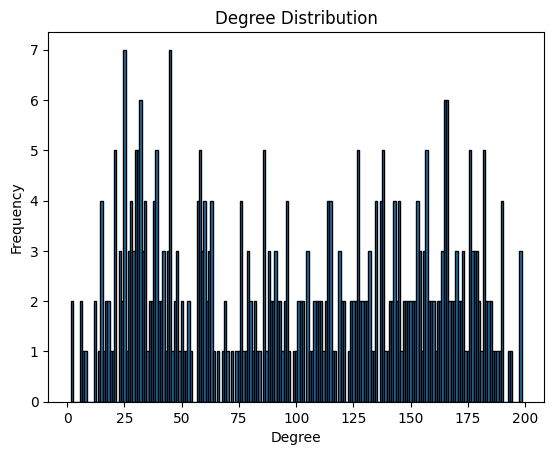

In [ ]:
# 그래프 degree 분포 확인
import matplotlib.pyplot as plt

# 노드의 degree 계산
degrees = [deg for _, deg in G.degree()]

# Degree 분포 출력
#print("Degree 분포:", degrees)
# Degree 분포 히스토그램
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [ ]:
dong_info = dong[['ADM_NM', 'geometry']]
dong_info

ADM_NM                                           geometry
0             사직동  POLYGON ((126.97399 37.57823, 126.97400 37.578...
1             삼청동  POLYGON ((126.97929 37.58349, 126.97931 37.583...
2             부암동  POLYGON ((126.96173 37.60714, 126.96182 37.607...
3             평창동  POLYGON ((126.97508 37.63118, 126.97488 37.630...
4             한남동  POLYGON ((127.00457 37.54980, 127.00457 37.549...
...           ...                                                ...
3475          가회동  POLYGON ((126.98909 37.58983, 126.98902 37.589...
3476  종로1·2·3·4가동  POLYGON ((126.98937 37.58764, 126.98947 37.587...
3481         방배2동  POLYGON ((126.99063 37.48487, 126.99083 37.484...
3482          미아동  POLYGON ((127.02739 37.63495, 127.02729 37.634...
3483          인수동  POLYGON ((127.01090 37.64496, 127.01097 37.644...

[426 rows x 2 columns]